In [1]:
import pandas as pd

In [2]:
dataset = pd.read_csv("Placement.csv")

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [4]:
dataset.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

# 1)Replace the NaN values with correct value. And justify why you have chosen the same.

In [5]:
dataset['salary'].fillna(0,inplace=True)

C:\Users\babuk\AppData\Local\Temp\ipykernel_25492\3738702580.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['salary'].fillna(0,inplace=True)


The reason for using fillna(0) is that the salary is missing (NaN) only for students who are not placed. Since unplaced students do not receive any salary, it makes sense to replace the missing values with 0.

# 2)How many of them are not placed?

In [6]:
dataset['status'].value_counts()

status
Placed        148
Not Placed     67
Name: count, dtype: int64

From the above value counts of status column, 67 students are not placed

# 3)Find the reason for non placement from the dataset?

In [16]:
non_placed = dataset[dataset['status']=='Not Placed']
non_placed

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
3,4,M,56.0,Central,52.0,Central,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43,Not Placed,0.0
5,6,M,55.0,Others,49.8,Others,Science,67.25,Sci&Tech,Yes,55.00,Mkt&Fin,51.58,Not Placed,0.0
6,7,F,46.0,Others,49.2,Others,Commerce,79.00,Comm&Mgmt,No,74.28,Mkt&Fin,53.29,Not Placed,0.0
9,10,M,58.0,Central,70.0,Central,Commerce,61.00,Comm&Mgmt,No,54.00,Mkt&Fin,52.21,Not Placed,0.0
12,13,F,47.0,Central,55.0,Others,Science,65.00,Comm&Mgmt,No,62.00,Mkt&HR,65.04,Not Placed,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,199,F,67.0,Central,70.0,Central,Commerce,65.00,Others,No,88.00,Mkt&HR,71.96,Not Placed,0.0
201,202,M,54.2,Central,63.0,Others,Science,58.00,Comm&Mgmt,No,79.00,Mkt&HR,58.44,Not Placed,0.0
206,207,M,41.0,Central,42.0,Central,Science,60.00,Comm&Mgmt,No,97.00,Mkt&Fin,53.39,Not Placed,0.0
208,209,F,43.0,Central,60.0,Others,Science,65.00,Comm&Mgmt,No,92.66,Mkt&HR,62.92,Not Placed,0.0


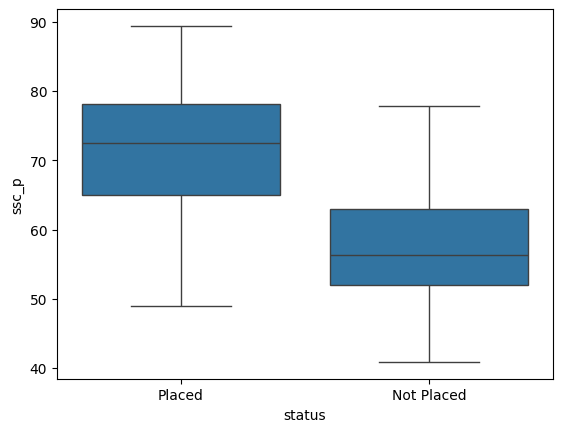

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Compare SSC percentage for placed vs. not placed
sns.boxplot(x='status', y='ssc_p', data=dataset)
plt.show()

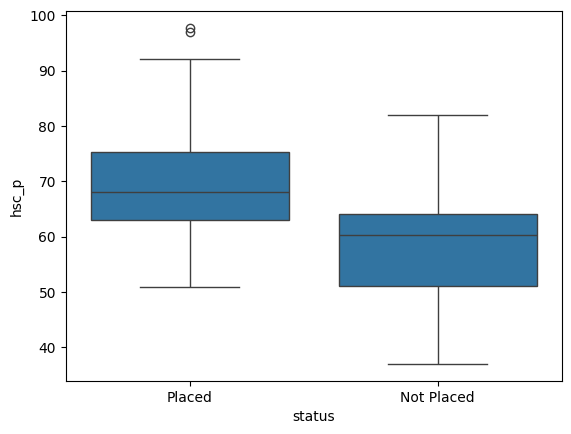

In [12]:
# Example: Compare HSC percentage for placed vs. not placed
sns.boxplot(x='status', y='hsc_p', data=dataset)
plt.show()

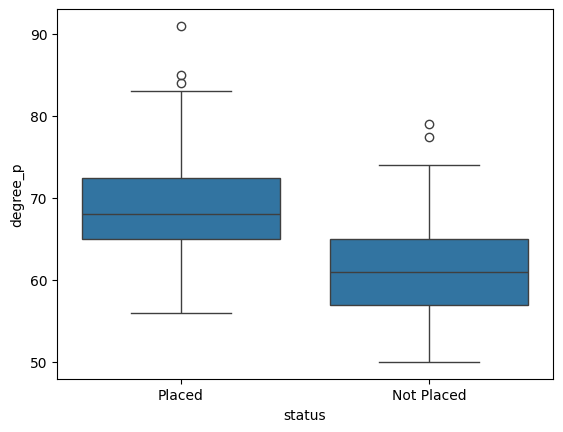

In [13]:
# Example: Compare Degree percentage for placed vs. not placed
sns.boxplot(x='status', y='degree_p', data=dataset)
plt.show()

A boxplot was used to examine the marks in ssc_p, hsc_p, and degree_p for students with a status of "Not Placed." It was observed that non-placed students tend to have scores below 40 in hsc_p and below 50 in both ssc_p and degree_p.

# 4)What kind of relation between salary and mba_p

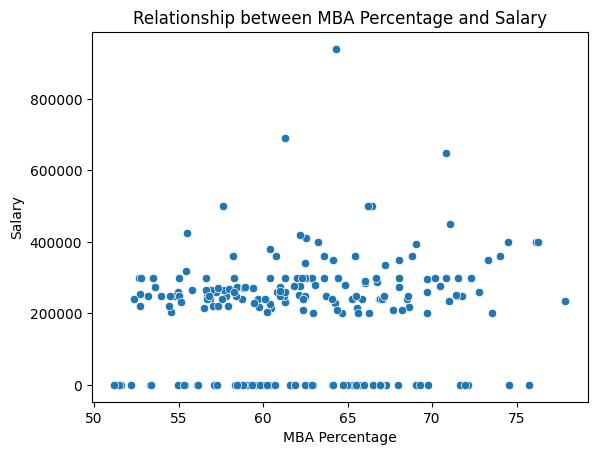

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='mba_p', y='salary', data=dataset)
plt.title('Relationship between MBA Percentage and Salary')
plt.xlabel('MBA Percentage')
plt.ylabel('Salary')
plt.show()

In [18]:
numeric_data = dataset.select_dtypes(include=['int64', 'float64'])

In [19]:
numeric_data.corr()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
sl_no,1.000000,-0.078155,-0.085711,-0.088281,0.063636,0.022327,0.002543
ssc_p,-0.078155,1.000000,0.511472,0.538404,0.261993,0.388478,0.538090
hsc_p,-0.085711,0.511472,1.000000,0.434206,0.245113,0.354823,0.452569
degree_p,-0.088281,0.538404,0.434206,1.000000,0.224470,0.402364,0.408371
etest_p,0.063636,0.261993,0.245113,0.224470,1.000000,0.218055,0.186988
mba_p,0.022327,0.388478,0.354823,0.402364,0.218055,1.000000,0.139823
salary,0.002543,0.538090,0.452569,0.408371,0.186988,0.139823,1.000000


There is a very weak positive correlation (0.14) between MBA percentage (mba_p) and salary, indicating that the MBA marks have a minimal direct impact on salary compared to other academic scores.

# 5)Which specialization is getting minimum salary?

In [32]:
placed = dataset[dataset['status']=='Placed']
placed

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
7,8,M,82.00,Central,64.00,Central,Science,66.00,Sci&Tech,Yes,67.0,Mkt&Fin,62.14,Placed,252000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,210,M,62.00,Central,72.00,Central,Commerce,65.00,Comm&Mgmt,No,67.0,Mkt&Fin,56.49,Placed,216000.0
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0


In [34]:
min_salary= placed.groupby('specialisation')['salary'].min().reset_index()

In [35]:
min_salary

,specialisation,salary
0,Mkt&Fin,200000.0
1,Mkt&HR,200000.0


From the dataset, I extracted the data of placed students and found that for the specializations Marketing & Finance and Marketing & HR, the minimum salary is ₹2 Lakhs.

# 6)How many of them getting above 500000 salary?

In [42]:
Data=dataset[dataset['salary']>500000]

In [44]:
Data

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
119,120,M,60.8,Central,68.40,Central,Commerce,64.6,Comm&Mgmt,Yes,82.66,Mkt&Fin,64.34,Placed,940000.0
150,151,M,71.0,Central,58.66,Central,Science,58.0,Sci&Tech,Yes,56.00,Mkt&Fin,61.30,Placed,690000.0
177,178,F,73.0,Central,97.00,Others,Commerce,79.0,Comm&Mgmt,Yes,89.00,Mkt&Fin,70.81,Placed,650000.0


# 7)Test the Analysis of Variance between etest_p and mba_p at signifance level 5%.(Make decision using Hypothesis Testing)

State the Hypotheses:

Null Hypothesis (H₀): There is no significant difference in mba_p scores across different groups of etest_p.

Alternative Hypothesis (H₁): There is a significant difference in mba_p scores across different groups of etest_p.

In [45]:
import scipy.stats as stats

stats.f_oneway(dataset['etest_p'],dataset['mba_p'])

F_onewayResult(statistic=98.64487057324706, pvalue=4.672547689133573e-21)

Since the p-value (≈ 0) is much smaller than the significance level α = 0.05, we reject the null hypothesis (H₀).

This means there is a highly significant difference in mba_p across different etest_p categories.

# 8)Test the similarity between the degree_t(Sci&Tech) and specialisation(Mkt&HR) with respect to salary at significance level of 5%.(Make decision using Hypothesis Testing)

In [ ]:
# Independant Sample- Unpaired T Test

In [46]:
from scipy.stats import ttest_ind
dataset=dataset.dropna()
degree = dataset[dataset['degree_t']=='Sci&Tech']['salary']
specila = dataset[dataset['specialisation']=='Mkt&HR']['salary']
ttest_ind(degree, specila)

TtestResult(statistic=2.692041243555374, pvalue=0.007897969943471179, df=152.0)

The significance level is α = 0.05.

Since p-value (0.0079) < 0.05, we reject the null hypothesis (H₀).

This means there is a statistically significant difference between the two groups being compared.

# 9)Convert the normal distribution to standard normal distribution for salary column

In [63]:
def get_pdf_probability(dataset,startrange,endrange):
    from matplotlib import pyplot
    from scipy.stats import norm
    import seaborn as sns
    ax = sns.distplot(dataset,kde=True,kde_kws={'color':'blue'},color='Green')
    pyplot.axvline(startrange,color='Red')
    pyplot.axvline(endrange,color='Red')
    # generate a sample
    sample = dataset
    # calculate parameters
    sample_mean =sample.mean()
    sample_std = sample.std()
    print('Mean=%.3f, Standard Deviation=%.3f' % (sample_mean, sample_std))
    # define the distribution
    dist = norm(sample_mean, sample_std)

    values = [value for value in range(startrange, endrange)]
    probabilities = [dist.pdf(value) for value in values]    
    prob=sum(probabilities)
   
    print("The area between range({},{}):{}".format(startrange,endrange,sum(probabilities)))
    return prob

C:\Users\babuk\AppData\Local\Temp\ipykernel_25492\2735081923.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dataset,kde=True,kde_kws={'color':'blue'},color='Green')


Mean=198702.326, Standard Deviation=154780.927
The area between range(300000,500000):0.23061819399277678


0.23061819399277678

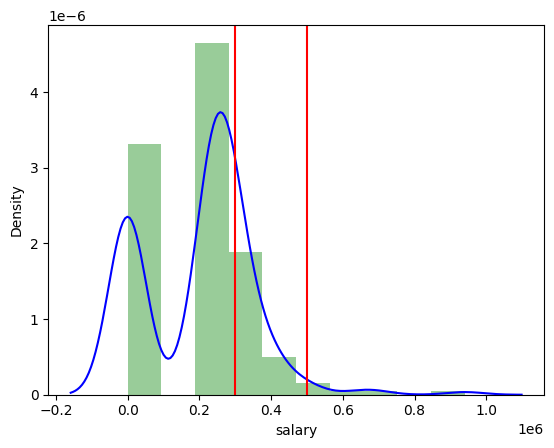

In [64]:
import numpy as np
get_pdf_probability(dataset["salary"],300000,500000)

In [56]:
def stdNBgraph(dataset):
        # Coverted to standard Normal Distribution
    import seaborn as sns
    mean=dataset.mean()
    std=dataset.std()

    values=[i for i in dataset]

    z_score=[((j-mean)/std) for j in values]

    sns.distplot(z_score,kde=True)

    sum(z_score)/len(z_score)

C:\Users\babuk\AppData\Local\Temp\ipykernel_25492\3623969288.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(z_score,kde=True)


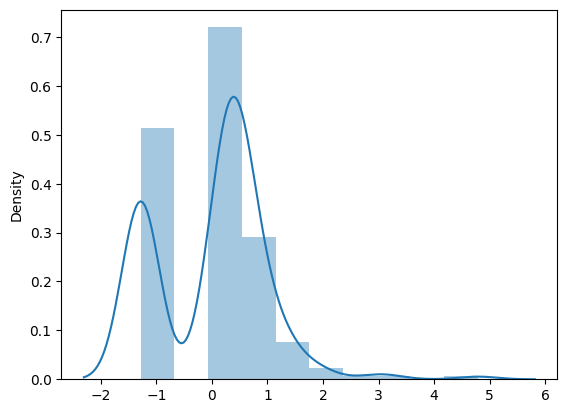

In [57]:
stdNBgraph(dataset["salary"])

# 10)What is the probability Density Function of the salary range from 700000 to 900000?

In [60]:
def pdf_probability(dataset,startrange,endrange):
    from matplotlib import pyplot
    from scipy.stats import norm
    import seaborn as sns
    ax = sns.distplot(dataset,kde=True,kde_kws={'color':'blue'},color='Green')
    pyplot.axvline(startrange,color='Red')
    pyplot.axvline(endrange,color='Red')
    # generate a sample
    sample = dataset
    # calculate parameters
    sample_mean =sample.mean()
    sample_std = sample.std()
    print('Mean=%.3f, Standard Deviation=%.3f' % (sample_mean, sample_std))
    # define the distribution
    dist = norm(sample_mean, sample_std)

    values = [value for value in range(startrange, endrange)]
    probabilities = [dist.pdf(value) for value in values]    
    prob=sum(probabilities)
   
    print("The area between range({},{}):{}".format(startrange,endrange,sum(probabilities)))
    return prob

C:\Users\babuk\AppData\Local\Temp\ipykernel_25492\95382724.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dataset,kde=True,kde_kws={'color':'blue'},color='Green')


Mean=198702.326, Standard Deviation=154780.927
The area between range(700000,900000):0.0005973310593974868


0.0005973310593974868

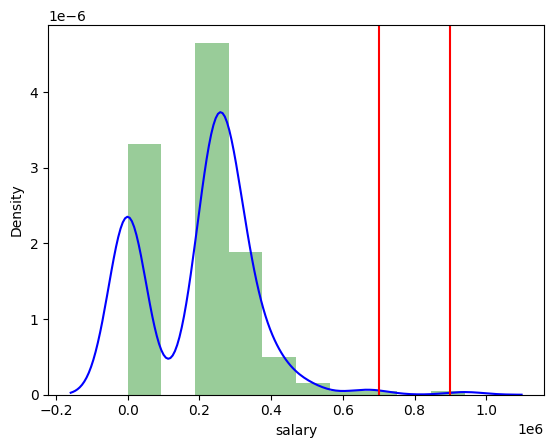

In [62]:
pdf_probability(dataset['salary'],700000,900000)

# 11)Test the similarity between the degree_t(Sci&Tech)with respect to etest_p and mba_p at significance level of 5%.(Make decision using Hypothesis Testing)

In [65]:
from scipy.stats import ttest_rel
etest_p = dataset[dataset['degree_t']=='Sci&Tech']['etest_p']
mba_p = dataset[dataset['degree_t']=='Sci&Tech']['mba_p']
ttest_rel(etest_p, mba_p)

TtestResult(statistic=5.0049844583693615, pvalue=5.517920600505392e-06, df=58)

The significance level is α = 0.05.

Since p-value (5.52) > 0.05, we accept the null hypothesis (H₀).

This means there is not significant difference between the two groups being compared.

# 12) Which parameter is highly correlated with salary?

In [67]:
numeric_data.corr()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
sl_no,1.000000,-0.078155,-0.085711,-0.088281,0.063636,0.022327,0.002543
ssc_p,-0.078155,1.000000,0.511472,0.538404,0.261993,0.388478,0.538090
hsc_p,-0.085711,0.511472,1.000000,0.434206,0.245113,0.354823,0.452569
degree_p,-0.088281,0.538404,0.434206,1.000000,0.224470,0.402364,0.408371
etest_p,0.063636,0.261993,0.245113,0.224470,1.000000,0.218055,0.186988
mba_p,0.022327,0.388478,0.354823,0.402364,0.218055,1.000000,0.139823
salary,0.002543,0.538090,0.452569,0.408371,0.186988,0.139823,1.000000


ssc_p parameter is highly correlated with salary

# 13) Plot any useful graph and explain it.

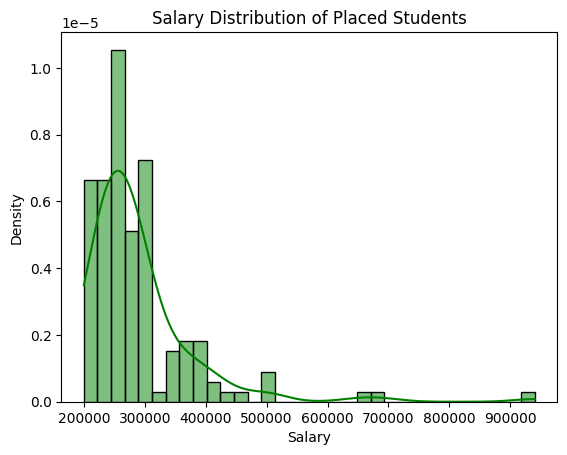

In [70]:
sns.histplot(placed['salary'], kde=True, color='green', stat='density')

# Labels and title
plt.xlabel('Salary')
plt.ylabel('Density')
plt.title('Salary Distribution of Placed Students')

# Show the plot
plt.show()

The distribution appears right-skewed, indicating that while most placed students have salaries clustered around ₹2–4 Lakhs, a few received very high salaries (e.g., above ₹9 Lakhs), creating long tails.

In [71]:
dataset.to_csv('finalPlacement.csv', index=False)